# Train baseline clinical transformer Model for Survival
This is the training of the clinical transformer withoug using pre-trained weights from the self uspervised model.

In [1]:

import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

tf.config.run_functions_eagerly(True)

import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')

2025-08-14 17:10:57.855773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 17:10:57.911785: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 17:10:58.260234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 17:10:58.260266: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 17:10:58.669259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 17:10:58.680150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:10:58.696302: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:10:58.696391: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-43:].tolist()

## Parameters

In [5]:
max_features_percentile=100
test_size=0.1 # fraction of samples used for testing
repetitions=10 # number replicates (training / testing) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=300
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/Survival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)
rm: cannot remove './results/Survival/': No such file or directory


## Training

In [7]:
outdir = './results/Survival/'

set_seed(0)

trainer = Trainer(
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 17:11:00,158	Setting up working directory: ./results/Survival/
INFO	2025-08-14 17:11:00,159	Number of continuous features: 43
INFO	2025-08-14 17:11:00,159	Number of discrete features: 0
INFO	2025-08-14 17:11:00,160	Number of samples: 562
INFO	2025-08-14 17:11:00,164	Number of classes: 1
INFO	2025-08-14 17:11:00,165	RUN ID: fold-0_id-0
INFO	2025-08-14 17:11:00,165	RUN ID out directory: ./results/Survival//fold-0_id-0/
INFO	2025-08-14 17:11:00,219	Training samples: 505
INFO	2025-08-14 17:11:00,219	Testing samples: 57
INFO	2025-08-14 17:11:00,221	Number of features at 100th percentile: 43 that are non nans
2025-08-14 17:11:00.221821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NU

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 17:11:01,078	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f562831b5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 17:11:01,299	AutoGraph could not transform <function sigmoid_concordance at 0x7f56504a3200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 522ms/step - loss: 0.5025 - sigmoid_concordance: 0.4924 - val_loss: 0.4969 - val_sigmoid_concordance: 0.5947
Epoch 2/300
1/1 [==============================] - 0s 282ms/step - loss: 0.5101 - sigmoid_concordance: 0.4815 - val_loss: 0.4948 - val_sigmoid_concordance: 0.5966
Epoch 3/300
1/1 [==============================] - 0s 285ms/step - loss: 0.4917 - sigmoid_concordance: 0.5145 - val_loss: 0.4928 - val_sigmoid_concordance: 0.5996
Epoch 4/300
1/1 [==============================] - 0s 284ms/step - loss: 0.5023 - sigmoid_concordance: 0.4974 - val_loss: 0.4904 - val_sigmoid_concordance: 0.6036
Epoch 5/300
1/1 [==============================] - 0s 283

INFO	2025-08-14 17:12:30,519	RUN ID: fold-1_id-1
INFO	2025-08-14 17:12:30,520	RUN ID out directory: ./results/Survival//fold-1_id-1/
INFO	2025-08-14 17:12:30,577	Training samples: 505
INFO	2025-08-14 17:12:30,577	Testing samples: 57
INFO	2025-08-14 17:12:30,579	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 470ms/step - loss: 0.4939 - sigmoid_concordance: 0.5128 - val_loss: 0.4950 - val_sigmoid_concordance: 0.5898
Epoch 2/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4907 - sigmoid_concordance: 0.5202 - val_loss: 0.4942 - val_sigmoid_concordance: 0.5932
Epoch 3/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4931 - sigmoid_concordance: 0.5152 - val_loss: 0.4921 - val_sigmoid_concordance: 0.5847
Epoch 4/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4881 - sigmoid_concordance: 0.5254 - val_loss: 0.4892 - val_sigmoid_concordance: 0.5813
Epoch 5/300
1/1 [==============================] - 0s 300ms/step - loss: 0.5036 - sigmoid_concordance: 0.4949 - val_loss: 0.4864 - val_sigmoid_concordance: 0.5804
Epoch 6/300
1/1 [==============================] - 0s 298ms/step - loss: 0.4820 - sigmoid_concordance: 0.5341 - val_loss: 0.4845 - val_sigmoid_concordance: 0.5821
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:14:02,007	RUN ID: fold-2_id-2
INFO	2025-08-14 17:14:02,007	RUN ID out directory: ./results/Survival//fold-2_id-2/
INFO	2025-08-14 17:14:02,063	Training samples: 505
INFO	2025-08-14 17:14:02,064	Testing samples: 57
INFO	2025-08-14 17:14:02,065	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.5045 - sigmoid_concordance: 0.4931 - val_loss: 0.4976 - val_sigmoid_concordance: 0.5350
Epoch 2/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5114 - sigmoid_concordance: 0.4725 - val_loss: 0.4968 - val_sigmoid_concordance: 0.5251
Epoch 3/300
1/1 [==============================] - 0s 293ms/step - loss: 0.5013 - sigmoid_concordance: 0.4930 - val_loss: 0.4962 - val_sigmoid_concordance: 0.5153
Epoch 4/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5106 - sigmoid_concordance: 0.4820 - val_loss: 0.4959 - val_sigmoid_concordance: 0.5218
Epoch 5/300
1/1 [==============================] - 0s 304ms/step - loss: 0.4914 - sigmoid_concordance: 0.5150 - val_loss: 0.4956 - val_sigmoid_concordance: 0.5194
Epoch 6/300
1/1 [==============================] - 0s 294ms/step - loss: 0.4847 - sigmoid_concordance: 0.5321 - val_loss: 0.4952 - val_sigmoid_concordance: 0.5128
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:15:33,559	RUN ID: fold-3_id-3
INFO	2025-08-14 17:15:33,560	RUN ID out directory: ./results/Survival//fold-3_id-3/
INFO	2025-08-14 17:15:33,616	Training samples: 505
INFO	2025-08-14 17:15:33,617	Testing samples: 57
INFO	2025-08-14 17:15:33,618	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 1s 563ms/step - loss: 0.5071 - sigmoid_concordance: 0.4853 - val_loss: 0.4925 - val_sigmoid_concordance: 0.7203
Epoch 2/300
1/1 [==============================] - 0s 298ms/step - loss: 0.4979 - sigmoid_concordance: 0.5033 - val_loss: 0.4901 - val_sigmoid_concordance: 0.7110
Epoch 3/300
1/1 [==============================] - 0s 301ms/step - loss: 0.4977 - sigmoid_concordance: 0.5049 - val_loss: 0.4904 - val_sigmoid_concordance: 0.7254
Epoch 4/300
1/1 [==============================] - 0s 298ms/step - loss: 0.5006 - sigmoid_concordance: 0.4998 - val_loss: 0.4871 - val_sigmoid_concordance: 0.7195
Epoch 5/300
1/1 [==============================] - 0s 304ms/step - loss: 0.4942 - sigmoid_concordance: 0.5111 - val_loss: 0.4840 - val_sigmoid_concordance: 0.7186
Epoch 6/300
1/1 [==============================] - 0s 296ms/step - loss: 0.4917 - sigmoid_concordance: 0.5151 - val_loss: 0.4797 - val_sigmoid_concordance: 0.7237
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:17:05,577	RUN ID: fold-4_id-4
INFO	2025-08-14 17:17:05,578	RUN ID out directory: ./results/Survival//fold-4_id-4/
INFO	2025-08-14 17:17:05,635	Training samples: 505
INFO	2025-08-14 17:17:05,635	Testing samples: 57
INFO	2025-08-14 17:17:05,636	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.4843 - sigmoid_concordance: 0.5387 - val_loss: 0.4958 - val_sigmoid_concordance: 0.5676
Epoch 2/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5004 - sigmoid_concordance: 0.5024 - val_loss: 0.4937 - val_sigmoid_concordance: 0.6012
Epoch 3/300
1/1 [==============================] - 0s 296ms/step - loss: 0.4936 - sigmoid_concordance: 0.5175 - val_loss: 0.4916 - val_sigmoid_concordance: 0.6198
Epoch 4/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4937 - sigmoid_concordance: 0.5092 - val_loss: 0.4902 - val_sigmoid_concordance: 0.6216
Epoch 5/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5089 - sigmoid_concordance: 0.4828 - val_loss: 0.4868 - val_sigmoid_concordance: 0.6242
Epoch 6/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5110 - sigmoid_concordance: 0.4776 - val_loss: 0.4833 - val_sigmoid_concordance: 0.6225
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:18:37,185	RUN ID: fold-5_id-5
INFO	2025-08-14 17:18:37,186	RUN ID out directory: ./results/Survival//fold-5_id-5/
INFO	2025-08-14 17:18:37,243	Training samples: 505
INFO	2025-08-14 17:18:37,244	Testing samples: 57
INFO	2025-08-14 17:18:37,245	Number of features at 100th percentile: 43 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 470ms/step - loss: 0.5001 - sigmoid_concordance: 0.5020 - val_loss: 0.5033 - val_sigmoid_concordance: 0.4413
Epoch 2/300
1/1 [==============================] - 0s 302ms/step - loss: 0.4987 - sigmoid_concordance: 0.4970 - val_loss: 0.5018 - val_sigmoid_concordance: 0.4688
Epoch 3/300
1/1 [==============================] - 0s 298ms/step - loss: 0.4878 - sigmoid_concordance: 0.5230 - val_loss: 0.5002 - val_sigmoid_concordance: 0.4917
Epoch 4/300
1/1 [==============================] - 0s 303ms/step - loss: 0.4827 - sigmoid_concordance: 0.5293 - val_loss: 0.5003 - val_sigmoid_concordance: 0.4688
Epoch 5/300
1/1 [==============================] - 0s 296ms/step - loss: 0.4970 - sigmoid_concordance: 0.5066 - val_loss: 0.4999 - val_sigmoid_concordance: 0.4661
Epoch 6/300
1/1 [==============================] - 0s 299ms/step - loss: 0.4876 - sigmoid_concordance: 0.5212 - val_loss: 0.4994 - val_sigmoid_concordance: 0.4670
Epoch 7/300
1/1 [=================

INFO	2025-08-14 17:20:09,135	RUN ID: fold-6_id-6
INFO	2025-08-14 17:20:09,135	RUN ID out directory: ./results/Survival//fold-6_id-6/
INFO	2025-08-14 17:20:09,193	Training samples: 505
INFO	2025-08-14 17:20:09,193	Testing samples: 57
INFO	2025-08-14 17:20:09,195	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 477ms/step - loss: 0.4945 - sigmoid_concordance: 0.5154 - val_loss: 0.4995 - val_sigmoid_concordance: 0.5027
Epoch 2/300
1/1 [==============================] - 0s 299ms/step - loss: 0.4927 - sigmoid_concordance: 0.5157 - val_loss: 0.4969 - val_sigmoid_concordance: 0.5319
Epoch 3/300
1/1 [==============================] - 0s 301ms/step - loss: 0.4886 - sigmoid_concordance: 0.5307 - val_loss: 0.4944 - val_sigmoid_concordance: 0.5390
Epoch 4/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4943 - sigmoid_concordance: 0.5109 - val_loss: 0.4918 - val_sigmoid_concordance: 0.5479
Epoch 5/300
1/1 [==============================] - 0s 298ms/step - loss: 0.4920 - sigmoid_concordance: 0.5187 - val_loss: 0.4897 - val_sigmoid_concordance: 0.5559
Epoch 6/300
1/1 [==============================] - 0s 300ms/step - loss: 0.4830 - sigmoid_concordance: 0.5359 - val_loss: 0.4872 - val_sigmoid_concordance: 0.5550
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:21:41,055	RUN ID: fold-7_id-7
INFO	2025-08-14 17:21:41,055	RUN ID out directory: ./results/Survival//fold-7_id-7/
INFO	2025-08-14 17:21:41,112	Training samples: 505
INFO	2025-08-14 17:21:41,113	Testing samples: 57
INFO	2025-08-14 17:21:41,114	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 0.5010 - sigmoid_concordance: 0.5021 - val_loss: 0.5010 - val_sigmoid_concordance: 0.4454
Epoch 2/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5117 - sigmoid_concordance: 0.4729 - val_loss: 0.5013 - val_sigmoid_concordance: 0.4659
Epoch 3/300
1/1 [==============================] - 0s 298ms/step - loss: 0.5116 - sigmoid_concordance: 0.4782 - val_loss: 0.5016 - val_sigmoid_concordance: 0.4603
Epoch 4/300
1/1 [==============================] - 0s 301ms/step - loss: 0.4924 - sigmoid_concordance: 0.5130 - val_loss: 0.5026 - val_sigmoid_concordance: 0.4500
Epoch 5/300
1/1 [==============================] - 0s 302ms/step - loss: 0.5000 - sigmoid_concordance: 0.4948 - val_loss: 0.5029 - val_sigmoid_concordance: 0.4491
Epoch 6/300
1/1 [==============================] - 0s 297ms/step - loss: 0.4973 - sigmoid_concordance: 0.5048 - val_loss: 0.5028 - val_sigmoid_concordance: 0.4510
Epoch 7/300
1/1 [=====

INFO	2025-08-14 17:23:12,918	RUN ID: fold-8_id-8
INFO	2025-08-14 17:23:12,918	RUN ID out directory: ./results/Survival//fold-8_id-8/
INFO	2025-08-14 17:23:12,976	Training samples: 505
INFO	2025-08-14 17:23:12,977	Testing samples: 57
INFO	2025-08-14 17:23:12,978	Number of features at 100th percentile: 43 that are non nans


Epoch 1/300


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1/1 [==============================] - 0s 473ms/step - loss: 0.5044 - sigmoid_concordance: 0.4934 - val_loss: 0.4928 - val_sigmoid_concordance: 0.6109
Epoch 2/300
1/1 [==============================] - 0s 300ms/step - loss: 0.5073 - sigmoid_concordance: 0.4865 - val_loss: 0.4902 - val_sigmoid_concordance: 0.6000
Epoch 3/300
1/1 [==============================] - 0s 296ms/step - loss: 0.5223 - sigmoid_concordance: 0.4509 - val_loss: 0.4887 - val_sigmoid_concordance: 0.6009
Epoch 4/300
1/1 [==============================] - 0s 296ms/step - loss: 0.4818 - sigmoid_concordance: 0.5357 - val_loss: 0.4873 - val_sigmoid_concordance: 0.5991
Epoch 5/300
1/1 [==============================] - 0s 300ms/step - loss: 0.4932 - sigmoid_concordance: 0.5073 - val_loss: 0.4847 - val_sigmoid_concordance: 0.5964
Epoch 6/300
1/1 [==============================] - 0s 300ms/step - loss: 0.4719 - sigmoid_concordance: 0.5581 - val_loss: 0.4830 - val_sigmoid_concordance: 0.5937
Epoch 7/300
1/1 [=================

INFO	2025-08-14 17:24:45,050	RUN ID: fold-9_id-9
INFO	2025-08-14 17:24:45,051	RUN ID out directory: ./results/Survival//fold-9_id-9/
INFO	2025-08-14 17:24:45,108	Training samples: 505
INFO	2025-08-14 17:24:45,108	Testing samples: 57
INFO	2025-08-14 17:24:45,110	Number of features at 100th percentile: 43 that are non nans
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/300
1/1 [==============================] - 0s 474ms/step - loss: 0.5056 - sigmoid_concordance: 0.4910 - val_loss: 0.5005 - val_sigmoid_concordance: 0.4785
Epoch 2/300
1/1 [==============================] - 0s 296ms/step - loss: 0.5000 - sigmoid_concordance: 0.4992 - val_loss: 0.4998 - val_sigmoid_concordance: 0.5170
Epoch 3/300
1/1 [==============================] - 0s 295ms/step - loss: 0.4931 - sigmoid_concordance: 0.5143 - val_loss: 0.4991 - val_sigmoid_concordance: 0.5349
Epoch 4/300
1/1 [==============================] - 0s 297ms/step - loss: 0.5141 - sigmoid_concordance: 0.4745 - val_loss: 0.4989 - val_sigmoid_concordance: 0.5421
Epoch 5/300
1/1 [==============================] - 0s 297ms/step - loss: 0.4991 - sigmoid_concordance: 0.5026 - val_loss: 0.4977 - val_sigmoid_concordance: 0.5457
Epoch 6/300
1/1 [==============================] - 0s 299ms/step - loss: 0.5034 - sigmoid_concordance: 0.4913 - val_loss: 0.4969 - val_sigmoid_concordance: 0.5511
Epoch 7/300
1/1 [=====

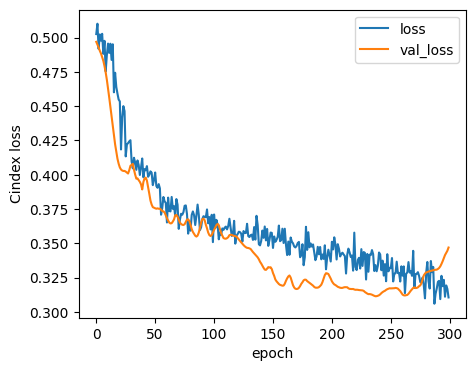

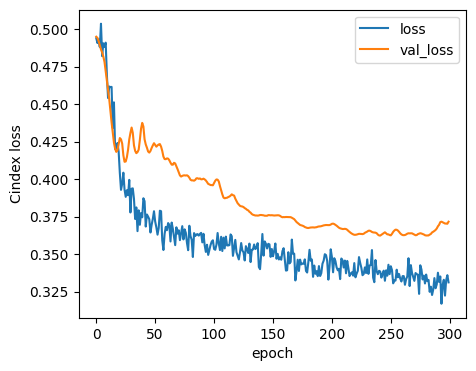

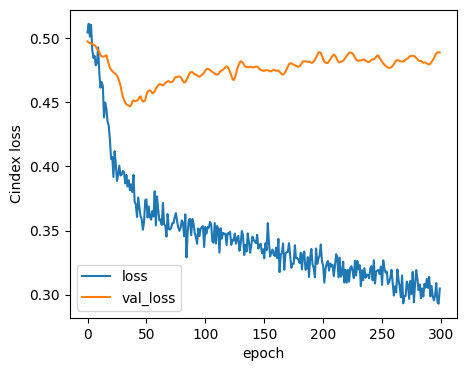

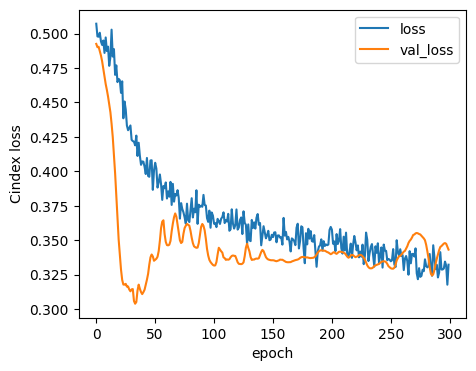

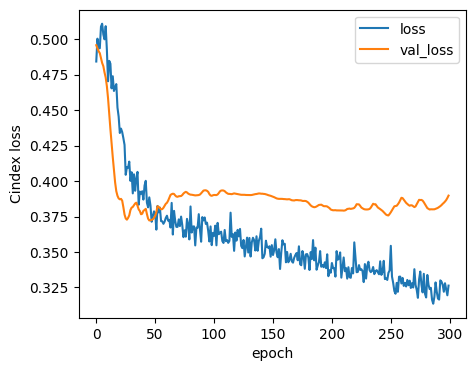

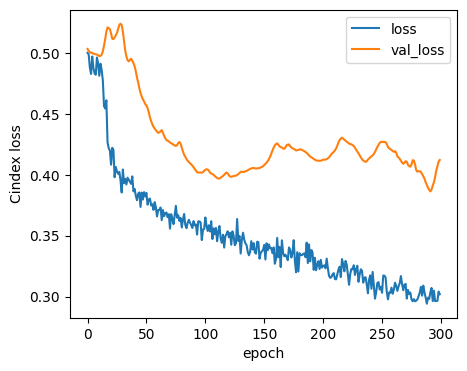

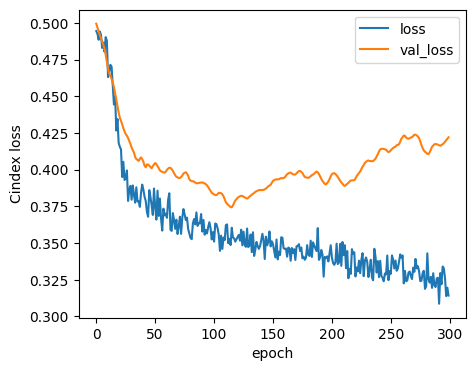

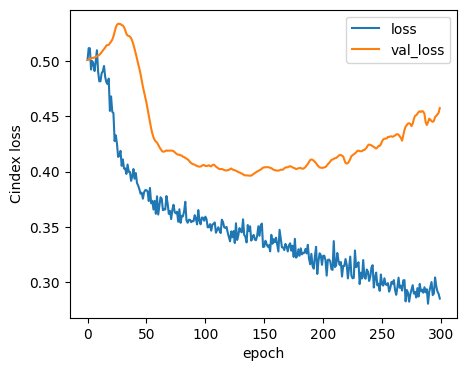

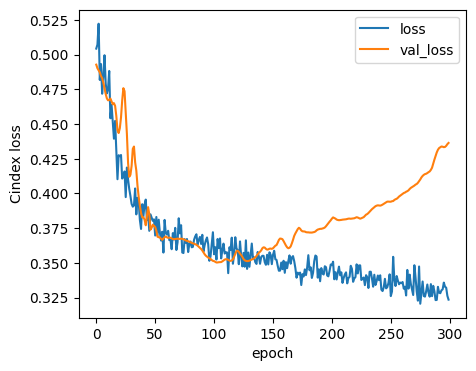

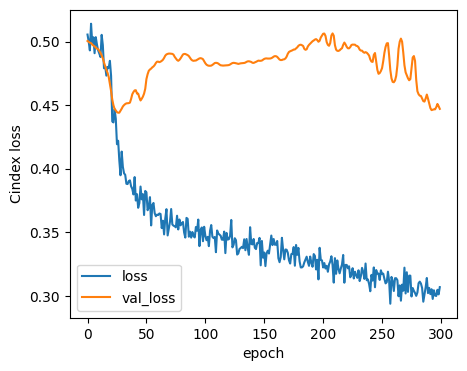

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/Survival/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')

    best_es.append(dfh.val_sigmoid_concordance)

best_epoch = pd.concat(best_es, axis=1).mean(axis=1).idxmax()

In [15]:
best_epoch

136